In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Load the Iris dataset
df = sns.load_dataset('iris')

# Display first few rows
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [17]:
# 1. List down the features and their types
print("1. Features and Their Types:\n")
for column in df.columns:
    dtype = df[column].dtype
    feature_type = 'numeric' if pd.api.types.is_numeric_dtype(dtype) else 'nominal'
    print(f"{column} - {feature_type}")

1. Features and Their Types:

sepal_length - numeric
sepal_width - numeric
petal_length - numeric
petal_width - numeric
species - nominal


In [25]:
# Get numeric columns (we'll use this for histogram and outlier detection)
numeric_columns = df.select_dtypes(include='number').columns


2. Histogram for Each Feature (Plotted Below)


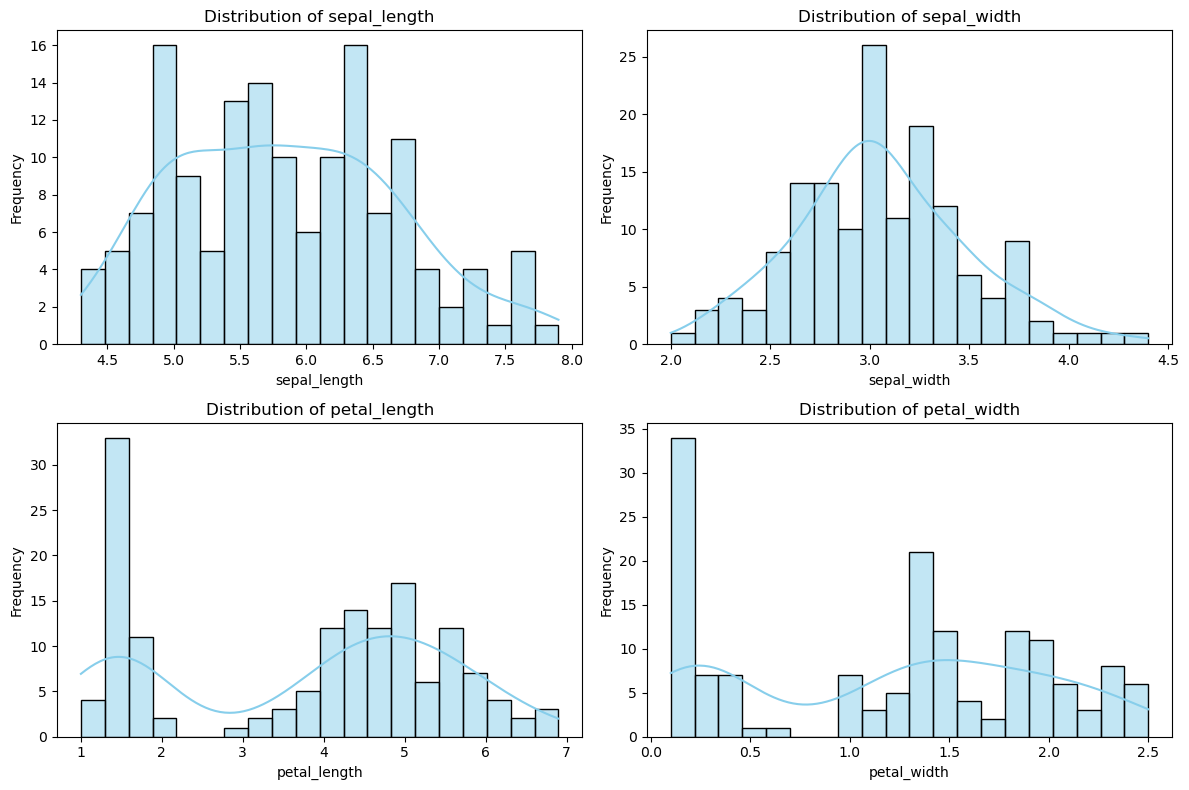

In [29]:
# 2. Create histogram for each feature using subplot
print("\n2. Histogram for Each Feature (Plotted Below)")
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [33]:
# 3. Identify potential outliers using IQR method
print("\n3. Observations and Outliers:")
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"- {column}: {len(outliers)} outliers")



3. Observations and Outliers:
- sepal_length: 0 outliers
- sepal_width: 4 outliers
- petal_length: 0 outliers
- petal_width: 0 outliers



4. Boxplot Subplots for Outliers (Plotted Below)


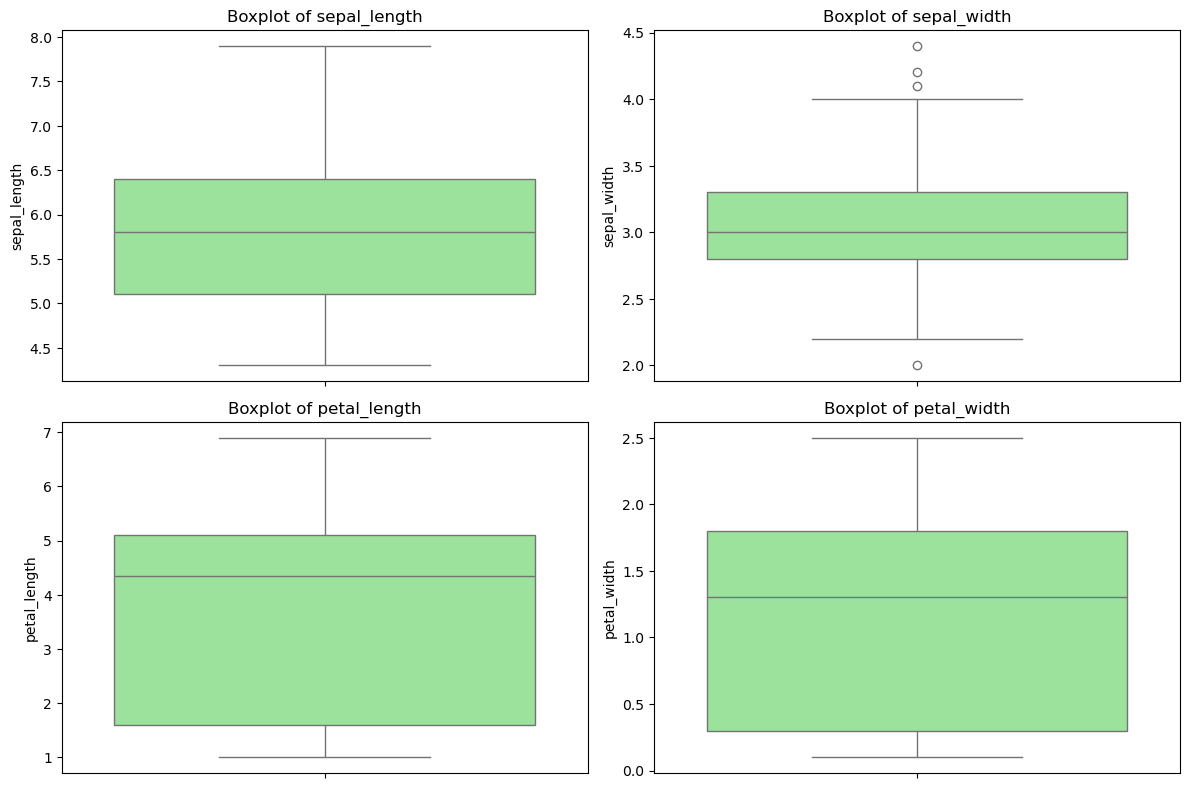

In [35]:
print("\n4. Boxplot Subplots for Outliers (Plotted Below)")
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=column, color='lightgreen')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Import required libraries
import pandas as pd                     # For data manipulation
import seaborn as sns                   # For visualization (histograms, boxplots)
import matplotlib.pyplot as plt         # For plotting
from sklearn.datasets import load_iris  # To load the built-in Iris dataset

# Load the Iris dataset into a DataFrame
iris = load_iris()  # Load the dataset from sklearn
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Create DataFrame with feature names
df['species'] = iris.target_names[iris.target]  # Add species column using target values

# 1. Display the features and their types
print("1. Features and Their Types:\n")
for column in df.columns:
    dtype = df[column].dtype  # Get data type
    feature_type = 'numeric' if pd.api.types.is_numeric_dtype(dtype) else 'nominal'  # Decide type
    print(f"{column} - {feature_type}")  # Print feature name and type

# Get all numeric columns from dataset for analysis
numeric_columns = df.select_dtypes(include='number').columns  # Select numeric columns only

# 2. Create histogram with KDE for each feature
print("\n2. Histogram for Each Feature (Plotted Below)")
plt.figure(figsize=(12, 8))  # Set figure size for all subplots
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid subplot for each feature
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')  # Plot histogram with KDE
    plt.title(f'Distribution of {column}')  # Title for each plot
    plt.xlabel(column)  # X-axis label
    plt.ylabel('Frequency')  # Y-axis label
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display all histograms

# 3. Use IQR to detect outliers for each feature
print("\n3. Observations and Outliers:")
for column in numeric_columns:
    q1 = df[column].quantile(0.25)  # Calculate Q1 (25th percentile)
    q3 = df[column].quantile(0.75)  # Calculate Q3 (75th percentile)
    iqr = q3 - q1  # Compute IQR
    lower_bound = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Upper bound for outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Filter outliers
    print(f"- {column}: {len(outliers)} outliers")  # Print outlier count

# 4. Create boxplots to visually identify outliers
print("\n4. Boxplot Subplots for Outliers (Plotted Below)")
plt.figure(figsize=(12, 8))  # Set figure size
for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)  # Create subplot for each feature
    sns.boxplot(data=df, y=column, color='lightgreen')  # Draw boxplot
    plt.title(f'Boxplot of {column}')  # Title for each boxplot
plt.tight_layout()  # Adjust layout
plt.show()  # Show all boxplots
